# Comp3115 Group J Sorce Code

In [33]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
from tqdm import tqdm # for making progress bar
from time import gmtime, strftime, time
import urllib.parse
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

## Task 1

### Step 1

In [ ]:
# Task 1

## Task 2

### Step 1

In [ ]:
# Task 2

## Task 3: Number of confirmed cases for a period of time

In [3]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

In [4]:
urls = generateAPILinks()
len(urls)

736

In [5]:
urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [6]:
latest_situation_of_reported_cases_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv')
len(latest_situation_of_reported_cases_covid_19_urls)

736

In [7]:
latest_situation_of_reported_cases_covid_19_urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [8]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[0]).head(5)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases
0,08/01/2020,12:00,0,21,17,38,0,0,0
1,09/01/2020,12:00,0,25,23,48,0,0,0
2,10/01/2020,12:00,0,31,23,54,0,0,0
3,11/01/2020,12:00,0,46,15,61,0,0,0
4,12/01/2020,12:00,0,51,16,67,0,0,0


In [9]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[-1]).tail(5)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
824,11/04/2022,NaN,NaN,NaN,NaN,NaN,8827,60605,NaN,60.0,751820.0,439770.0
825,12/04/2022,NaN,NaN,NaN,NaN,NaN,8886,62035,NaN,58.0,752555.0,440468.0
826,13/04/2022,NaN,NaN,NaN,NaN,NaN,8948,63579,NaN,54.0,753289.0,441006.0
827,14/04/2022,NaN,NaN,NaN,NaN,NaN,9002,65086,NaN,58.0,753868.0,441470.0
828,15/04/2022,NaN,NaN,NaN,NaN,NaN,9069,66797,NaN,56.0,754339.0,441945.0


### Fetching Data

In [10]:
latest_situation_of_reported_cases_covid_19_df = pd.DataFrame()
for u in tqdm(latest_situation_of_reported_cases_covid_19_urls):
  latest_situation_of_reported_cases_covid_19_df = pd.concat([latest_situation_of_reported_cases_covid_19_df, pd.read_csv(u)], ignore_index=True)

100%|█████████████████████████████████████████| 736/736 [06:03<00:00,  2.03it/s]


In [11]:
latest_situation_of_reported_cases_covid_19_df.to_csv('latest_situation_of_reported_cases_covid_19.csv')

In [12]:
latest_situation_of_reported_cases_covid_19_df = pd.read_csv('latest_situation_of_reported_cases_covid_19.csv', index_col=0)

### Data Processing

In [13]:
latest_situation_of_reported_cases_covid_19_df.index = latest_situation_of_reported_cases_covid_19_df['As of date']

In [14]:
type(latest_situation_of_reported_cases_covid_19_df.index)

pandas.core.indexes.base.Index

In [15]:
latest_situation_of_reported_cases_covid_19_df.index = pd.to_datetime(latest_situation_of_reported_cases_covid_19_df.index)

In [16]:
latest_situation_of_reported_cases_covid_19_df.index

DatetimeIndex(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-06-04', '2022-07-04', '2022-08-04', '2022-09-04',
               '2022-10-04', '2022-11-04', '2022-12-04', '2022-04-13',
               '2022-04-14', '2022-04-15'],
              dtype='datetime64[ns]', name='As of date', length=336185, freq=None)

In [17]:
latest_situation_of_reported_cases_covid_19_df = latest_situation_of_reported_cases_covid_19_df[~latest_situation_of_reported_cases_covid_19_df.index.duplicated(keep='first')].to_csv('clean.csv')

In [21]:
df = pd.read_csv('clean.csv', index_col=0)

In [22]:
df = df[df.index.notnull()]

In [23]:
df.index

Index(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
       ...
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-01-04',
       '2022-02-04', '2022-03-04', '2022-04-04', '2022-05-04', '2022-06-04'],
      dtype='object', name='As of date', length=820)

### Exploring Data

In [24]:
df.head(5)

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
As of date,,,,,,,,,,,,,
2020-08-01,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-09-01,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-10-01,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-11-01,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-12-01,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN


In [25]:
df.tail(5)

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
As of date,,,,,,,,,,,,,
2022-02-04,02/04/2022,NaN,NaN,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0
2022-03-04,03/04/2022,NaN,NaN,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0
2022-04-04,04/04/2022,NaN,NaN,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0
2022-05-04,05/04/2022,NaN,NaN,NaN,NaN,NaN,8349,54168,NaN,71.0,NaN,745253.0,432561.0
2022-06-04,06/04/2022,NaN,NaN,NaN,NaN,NaN,8460,54823,NaN,74.0,NaN,746742.0,433849.0


### Feature engineering

In [27]:
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus'], inplace=True)
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'], inplace=True)

In [26]:
df['Number of confirmed cases per day']= df['Number of confirmed cases'].diff()
df['Number of death cases per day']= df['Number of death cases'].diff()
df

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests,Number of confirmed cases per day,Number of death cases per day
As of date,,,,,,,,,,,,,,,
2020-08-01,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-10-01,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-11-01,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-12-01,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,02/04/2022,NaN,NaN,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0,NaN,116.0
2022-03-04,03/04/2022,NaN,NaN,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0,NaN,111.0
2022-04-04,04/04/2022,NaN,NaN,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0,NaN,90.0


### Visualization

<AxesSubplot:xlabel='As of date', ylabel='Number of confirmed cases per day'>

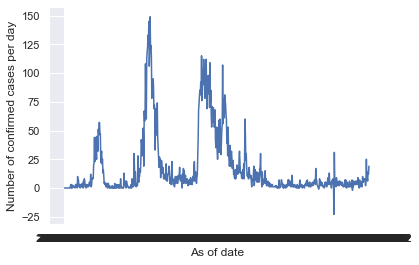

In [34]:
sns.set_theme(style="darkgrid")

sns.lineplot(x=df.index, y='Number of confirmed cases per day',
             data=df)

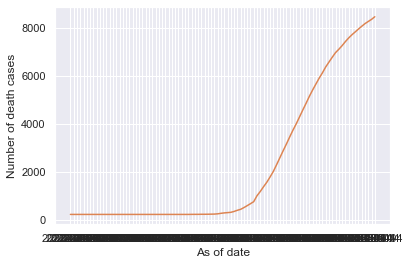

In [35]:
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of confirmed cases per day',
             data=df.loc['2022-03-01':'2022-06-04']);
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of death cases',
             data=df.loc['2022-03-01':'2022-06-04']);

### Virus Predictor using Machine Learning

#### Prepare Data

In [30]:
df.insert(0, 'id', range(1, 1 + len(df)))

In [31]:
df

,id,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests,Number of confirmed cases per day,Number of death cases per day
As of date,,,,,,,,,,,,,,,,
2020-08-01,1,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-10-01,3,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-11-01,4,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-12-01,5,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,816,02/04/2022,NaN,740174.0,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0,NaN,116.0
2022-03-04,817,03/04/2022,NaN,742006.0,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0,NaN,111.0
2022-04-04,818,04/04/2022,NaN,743595.0,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0,NaN,90.0


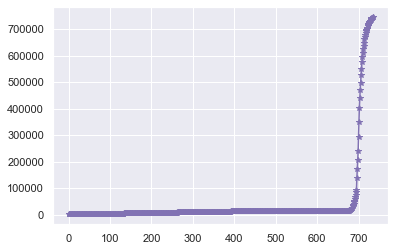

In [32]:
x = np.array(df['id'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
y = np.array(df['Number of confirmed cases'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
plt.plot(y, '-m*')
plt.show()

In [36]:
polyFeat = PolynomialFeatures(degree=4)
x = polyFeat.fit_transform(x)
print(x)

[[1.00000000e+00 8.50000000e+01 7.22500000e+03 6.14125000e+05
  5.22006250e+07]
 [1.00000000e+00 8.60000000e+01 7.39600000e+03 6.36056000e+05
  5.47008160e+07]
 [1.00000000e+00 8.70000000e+01 7.56900000e+03 6.58503000e+05
  5.72897610e+07]
 ...
 [1.00000000e+00 8.18000000e+02 6.69124000e+05 5.47343432e+08
  4.47726927e+11]
 [1.00000000e+00 8.19000000e+02 6.70761000e+05 5.49353259e+08
  4.49920319e+11]
 [1.00000000e+00 8.20000000e+02 6.72400000e+05 5.51368000e+08
  4.52121760e+11]]


### Training Data

------------------------------
TRAINING DATA
------------------------------
Accuracy:73.969 %


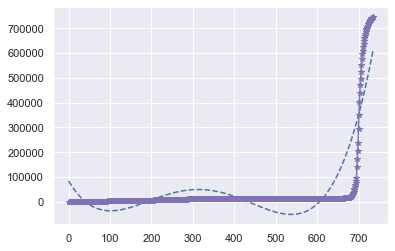

In [37]:
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0, '--b')
plt.plot(y, '-m*')
plt.show()

#### Prediction

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 700 days:2.23 Million


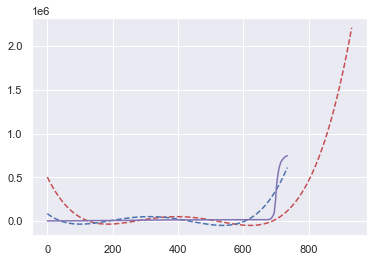

In [38]:
days = 700
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {days} days:', end='')
print(round(int(model.predict(polyFeat.fit_transform([[234+days]])))/1000000,2), 'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1, '--r')
plt.plot(y0, '--b')
plt.plot(y, '-m')

plt.show()

## Task 4: Possible factors that affect death rate

### Data fetching

In [4]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

enhanced_sur_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv')

enhanced_sur_covid_19_df = pd.DataFrame()
for u in tqdm(enhanced_sur_covid_19_urls):
  enhanced_sur_covid_19_df = pd.concat([enhanced_sur_covid_19_df, pd.read_csv(u, index_col=0)])
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng.csv')

100%|█████████████████████████████████████████| 698/698 [11:22<00:00,  1.02it/s]


### Data cleaning

In [5]:
# Import dataframe
enhanced_sur_covid_19_df = pd.read_csv('enhanced_sur_covid_19_eng.csv',index_col=0)

# Data Cleaning
enhanced_sur_covid_19_df.drop(enhanced_sur_covid_19_df.iloc[:, [
                              1, 10, 11, 12]], axis=1, inplace=True)
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Hospitalised/Discharged/Deceased'].isin(['Discharged', 'Deceased'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['HK/Non-HK resident'].isin(['HK resident', 'Non-HK resident'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Report date'] != '16/0了7/2020']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Date of onset'].str.contains('/') == True]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '1 month']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '<1']

# Export
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng_clean.csv')

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,8,9,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Simple Visual

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<Figure size 432x288 with 0 Axes>

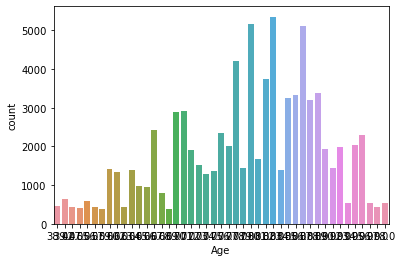

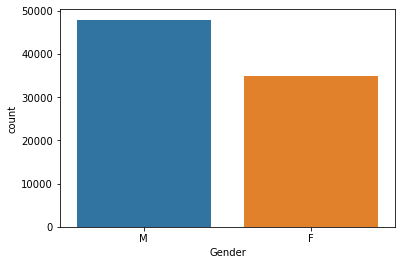

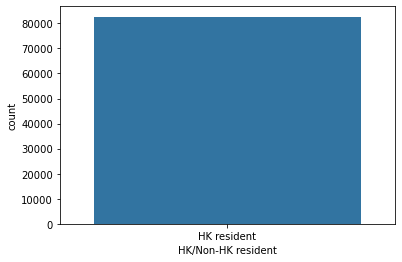

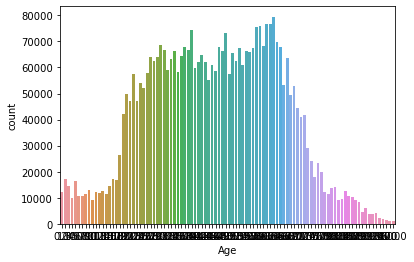

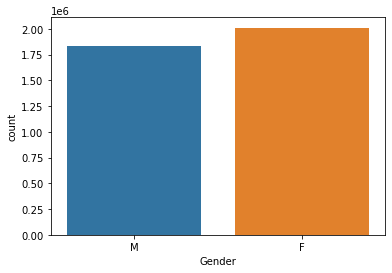

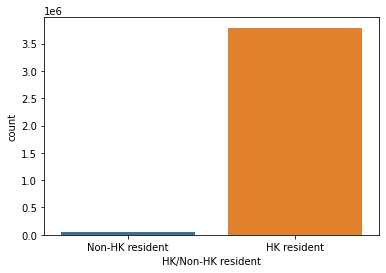

<Figure size 432x288 with 0 Axes>

In [54]:
# Import dataframe
df = pd.read_csv('enhanced_sur_covid_19_eng_clean.csv', index_col=0)

# Filtering
death = df[df['Hospitalised/Discharged/Deceased'] == 'Deceased']
discharge = df[df['Hospitalised/Discharged/Deceased'] == 'Discharged']

# Simple Visual
sns.countplot(data=death,x='Age')
plt.figure()
sns.countplot(data=death,x='Gender')
plt.figure()
sns.countplot(data=death,x='HK/Non-HK resident')
plt.figure()
sns.countplot(data=discharge,x='Age')
plt.figure()
sns.countplot(data=discharge,x='Gender')
plt.figure()
sns.countplot(data=discharge,x='HK/Non-HK resident')
plt.figure()

### Data processing

In [55]:
df['Gender'] = df['Gender'].replace(['M', 'F'], [0, 1])
df['Gender'] = df['Gender'].astype(int)
df['Name of hospital admitted'] = df['Name of hospital admitted'].astype(
    'category')
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].replace(
    ['Discharged', 'Deceased'], [0, 1])
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].astype(
    int)
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].replace(
    ['HK resident', 'Non-HK resident'], [0, 1])
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].astype(
    int)
df['Case classification*'] = df['Case classification*'].astype(
    'category')
df['Age'] = df['Age'].astype(float)
df['Age'] = df['Age'].astype(int)
df['Confirmed/probable'] = df['Confirmed/probable'].astype(
    'category')
df['Report date'] = pd.to_datetime(
    df['Report date'].astype(str), format="%d/%m/%Y")
df['Date of onset'] = pd.to_datetime(
    df['Date of onset'].astype(str), format="%d/%m/%Y")
df.index = df['Date of onset']